In [1]:
# mois -- Amount of water per 100 grams in the sample
# prot -- Amount of protein per 100 grams in the sample
# fat -- Amount of fat per 100 grams in the sample
# ash -- Amount of ash per 100 grams in the sample
# sodium -- Amount of sodium per 100 grams in the sample
# carb -- Amount of carbohydrates per 100 grams in the sample
# cal -- Amount of calories per 100 grams in the sample

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# load and prepare the data
features = ['id', 'mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal'] 
data = pd.read_csv('pizza.csv', names=features)
pizza_ids = data['id']
data = data.drop(columns=['id'])
scaled_data = preprocessing.scale(data.T)
print("scaled_data")
print(scaled_data)

scaled_data
[[ 0.81324541  0.87093576  0.8348417  ...  2.0188941   2.11223962
   2.07746518]
 [ 0.40006427  0.39595668  0.30305835 ... -0.25675983 -0.27850175
  -0.31471978]
 [ 1.91570837  1.88264778  1.94357182 ...  0.08384192  0.02701403
   0.04737916]
 ...
 [-0.87116282 -0.88313637 -0.86482948 ... -0.96035349 -0.91333138
  -0.91972946]
 [-0.9358234  -0.93372197 -0.91762615 ...  0.75893902  0.62453857
   0.69384561]
 [-0.66683537 -0.68276483 -0.65364279 ... -0.80565787 -0.77182934
  -0.77463078]]


In [3]:
# create PCA optject and do the math
pca = PCA()
pca.fit(scaled_data) 
pca_data = pca.transform(scaled_data)
print("pca_data")
print(pca_data)

pca_data
[[ 2.84473977e+01 -6.31053961e+00 -4.16693923e+00 -8.28055243e-01
  -3.61103963e-03  4.92923206e-05 -1.11022302e-15]
 [-2.07571438e+00 -5.92076644e+00 -2.52012373e-01  3.37973561e+00
  -1.32462355e-02  3.27716382e-03  7.91033905e-16]
 [ 4.93236424e+00 -6.46366132e+00  8.04153675e+00 -8.38050115e-01
  -5.58063192e-04  3.20087142e-03  3.36189410e-15]
 [-1.32472637e+01 -1.00217195e+00 -1.57730057e+00 -5.93564440e-01
   2.56857334e-01 -1.03170527e-02  1.19348975e-15]
 [-1.52881718e+01  4.09559473e-02 -2.01007744e+00 -9.27614039e-01
  -9.62514045e-02  5.19376635e-02  1.83186799e-15]
 [ 9.73842137e+00  1.94332008e+01  1.18163558e+00  4.60917654e-01
   9.81059554e-03  2.01316117e-03 -5.37070388e-15]
 [-1.25070334e+01  2.22982568e-01 -1.21684272e+00 -6.53369426e-01
  -1.53001187e-01 -5.01610995e-02  9.15933995e-16]]


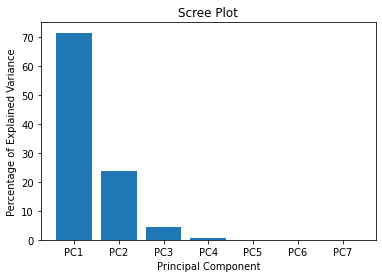

In [4]:
# Scree plot the PCA calcualations
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# we can see that PC1 and PC2 are the most important
# we ignore the rest

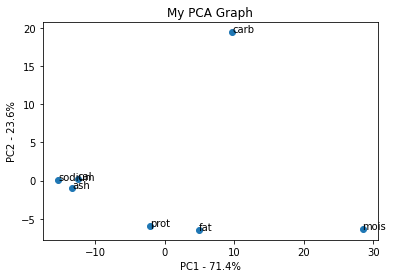

In [5]:
# plot the features using the pca data

pca_df = pd.DataFrame(pca_data, index=features[1:], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

# we can see that ash, cal and sodium are very corelated
# fat and prot are somehow corelated
# while mois and carb are not corelated

In [6]:
loading_scores = pd.Series(pca.components_[0], index=pizza_ids)
# sort the loading scores based on their effect on the PCA
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the ids of the top 10 pizzas that affected the PCA
top_pizza_ids = sorted_loading_scores[0:10].index.values
 
print(loading_scores[top_pizza_ids])

id
24069    0.068259
24056    0.068199
34043    0.068154
34044    0.067990
34041    0.067959
34045    0.067904
24065    0.067901
24063    0.067889
24068    0.067862
24075    0.067859
dtype: float64
